# Project: Investigate a Dataset of BigMart Sales Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### The dataset contains the values of the items sold in BIGMART SALE. It includes data of all the items and their characteristics like the weight, fat contents, type, MRP and also the information about the outlets like outlet establishment year, outlet size, outlet type and its location.

### We are trying to answer following questions:

#### 1. What is the realtion betweeen Item_Type and Item_Outlet_Sales?
#### 2. What is the relation between Item_Visibility and Item_Outlet_Sales?
#### 3. What is the relation between Outlet_Location_Type and Item_Outlet_Sales
#### 4. What is the relation between Item_Fat_Content amd Item_Outlet_Sales?
#### 5. What is the relation between Item_Fat_Content and Item_Type
#### 6. What is the relation between Item_Type and Item_MRP
####


In [29]:
#import libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from pyquery import PyQuery as pq
%matplotlib inline
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [30]:
#read movies database 
train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
# get information abou the database to help you for cleaning and analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [32]:
# get the shap of the database 
train.shape

(8523, 12)

In [33]:
train.duplicated().sum()
data_train = train.copy()
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Complete the missing data into our Database

In [37]:
data_train['Outlet_Size'].fillna('Medium',inplace=True)
data_train['Outlet_Size'].isnull().sum()
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(),inplace=True)
data_train['Item_Weight'].isnull().sum()
data_train['Item_Sales_Counts'] = data_train ['Item_Outlet_Sales'] / data_train['Item_MRP']
data_train['Item_Sales_Counts']=data_train['Item_Sales_Counts'].astype('int')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Sales_Counts          8523 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(7)
mem

In [38]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Sales_Counts
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,14.931714
std,4.226124,0.051598,62.275067,8.371760,1706.499616,9.211868
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,8.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,21.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.000000


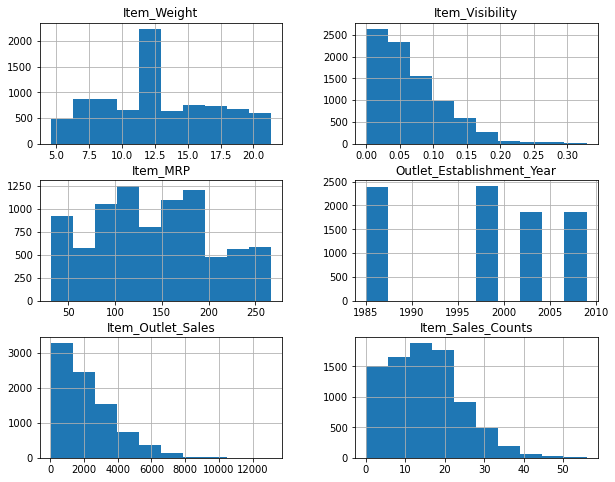

In [39]:
data_train.hist(figsize=(10,8));

### as showen here sales of small products are better
### visability of small products better 

# Questions

### 1. What is the realtion betweeen Item_Type and Item_Outlet_Sales?

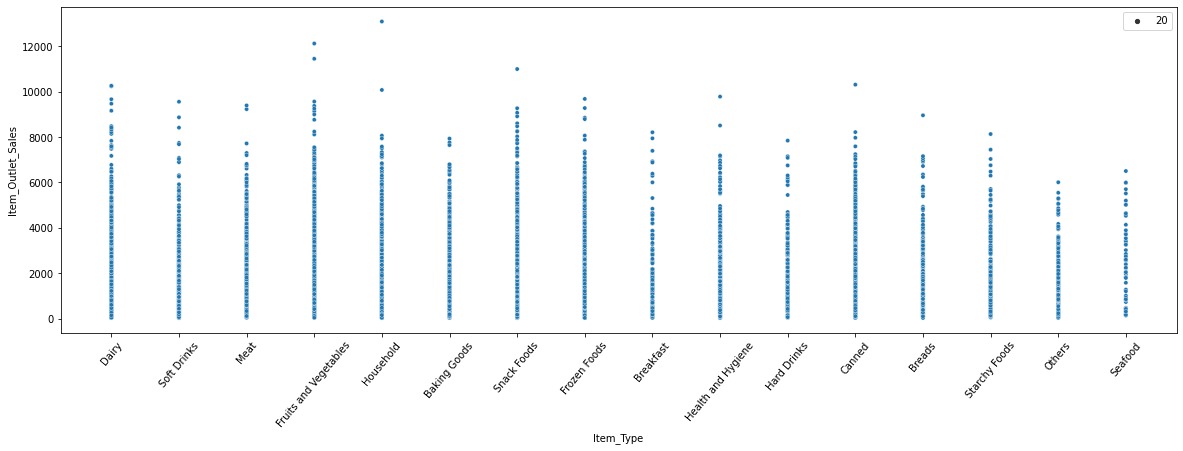

In [53]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 6])
sb.scatterplot(data = data_train, x = 'Item_Type', y = 'Item_Outlet_Sales' ,size=20 )
plt.xticks(rotation=50);


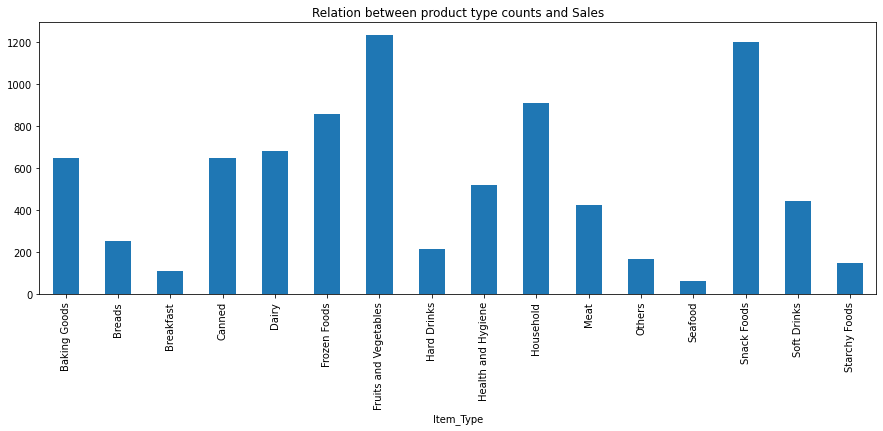

In [91]:
data_train.groupby(['Item_Type']).Item_Outlet_Sales.count()
data_train.groupby(['Item_Type']).Item_Outlet_Sales.count().plot(kind='bar' , figsize=(15,5) , title='Relation between product type counts and Sales' );


In [82]:
print('Fruits and Vegetables are the most sales' ,data_train.groupby(['Item_Type']).Item_Outlet_Sales.count().max())

Fruits and Vegetables are the most sales 1232


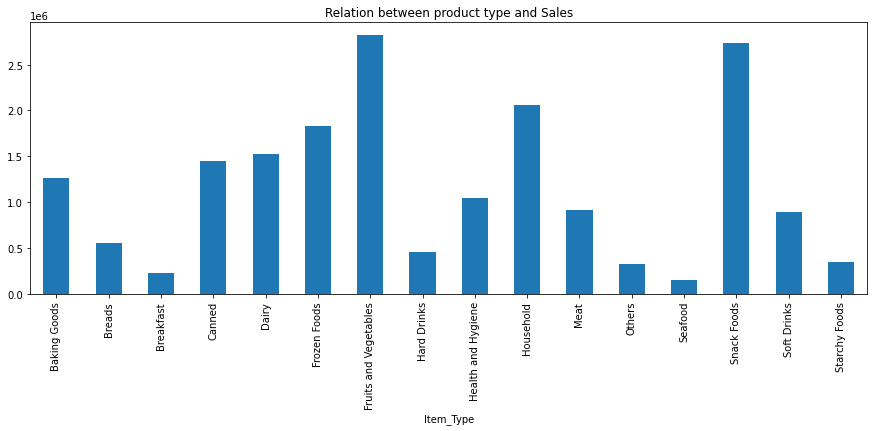

In [89]:
data_train.groupby(['Item_Type']).Item_Outlet_Sales.sum()
data_train.groupby(['Item_Type']).Item_Outlet_Sales.sum().plot(kind='bar' , figsize=(15,5) , title='Relation between product type and Sales' );


In [90]:
print('Fruits and Vegetables are the most sales' ,data_train.groupby(['Item_Type']).Item_Outlet_Sales.sum().max())

Fruits and Vegetables are the most sales 2820059.8168000015


**Fruits and Vegetables best sales and more counts**

## What is the relation betweeen 'Item_Visibility' and 'Item_Outlet_Sales'?

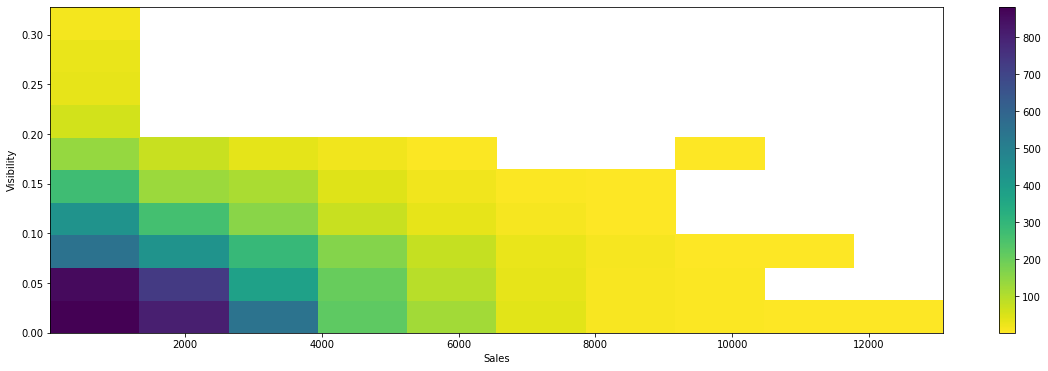

In [98]:
plt.figure(figsize = [20, 6])
plt.hist2d(data = data_train, y = 'Item_Visibility', x = 'Item_Outlet_Sales', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.ylabel('Visibility')
plt.xlabel('Sales');


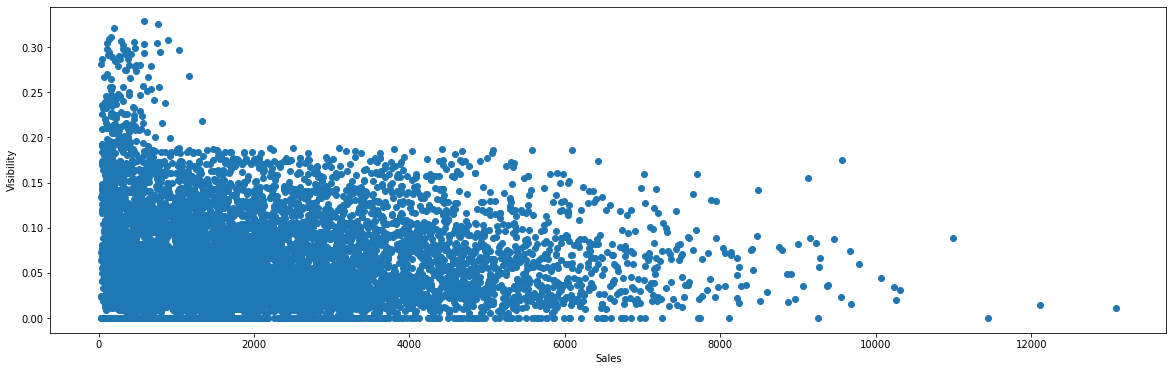

In [99]:
plt.figure(figsize = [20, 6])

plt.scatter(data = data_train, y = 'Item_Visibility', x = 'Item_Outlet_Sales')

plt.ylabel('Visibility')
plt.xlabel('Sales');


In [103]:
data_train[data_train['Item_Identifier']=='FDA15']
#data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Sales_Counts
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
831,FDA15,9.300000,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Medium,Tier 2,Supermarket Type1,5976.2208,23
2599,FDA15,9.300000,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,26
2643,FDA15,9.300000,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,23
4874,FDA15,9.300000,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Medium,Tier 3,Grocery Store,498.0184,2
5413,FDA15,9.300000,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,25
6696,FDA15,12.857645,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,25
7543,FDA15,9.300000,LF,0.016113,Dairy,248.8092,OUT017,2007,Medium,Tier 2,Supermarket Type1,5976.2208,24


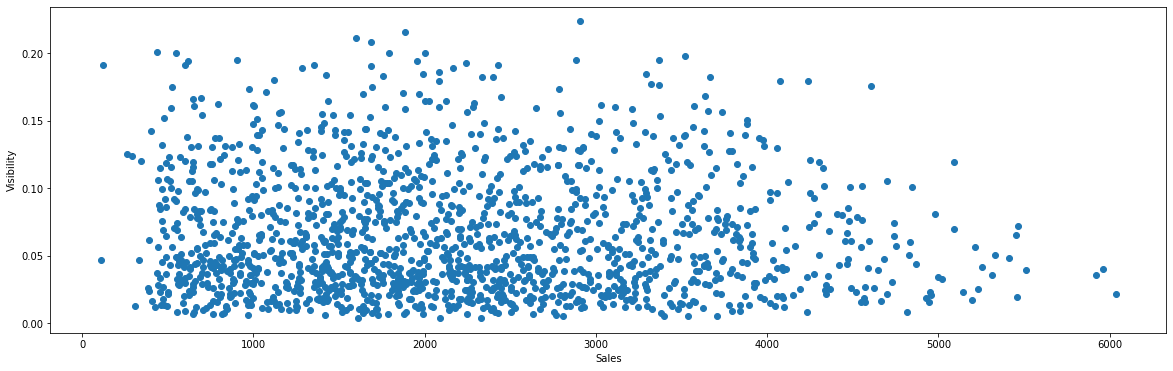

In [107]:
data_train.groupby(['Item_Identifier'])[['Item_Visibility' , 'Item_Outlet_Sales']].mean()
#.max()
plt.figure(figsize = [20, 6])

plt.scatter(data = data_train.groupby(['Item_Identifier'])[['Item_Visibility' , 'Item_Outlet_Sales']].mean(), y = 'Item_Visibility', x = 'Item_Outlet_Sales')

plt.ylabel('Visibility')
plt.xlabel('Sales');


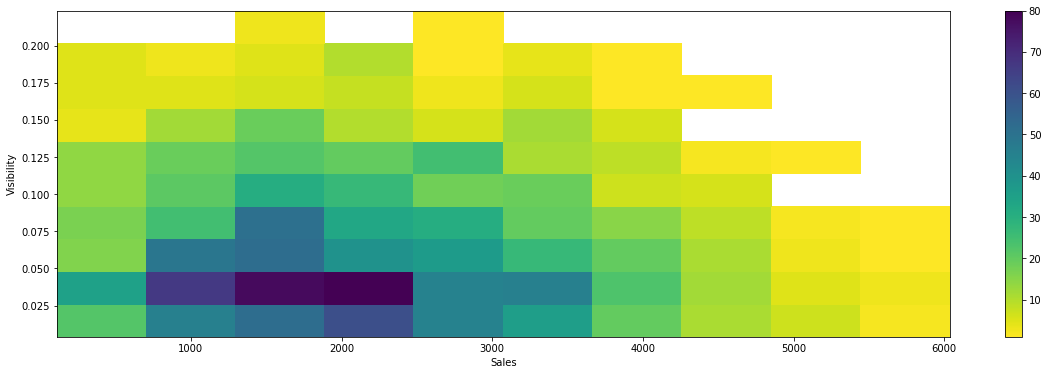

In [108]:
plt.figure(figsize = [20, 6])
plt.hist2d(data = data_train.groupby(['Item_Identifier'])[['Item_Visibility' , 'Item_Outlet_Sales']].mean(), y = 'Item_Visibility', x = 'Item_Outlet_Sales', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.ylabel('Visibility')
plt.xlabel('Sales');


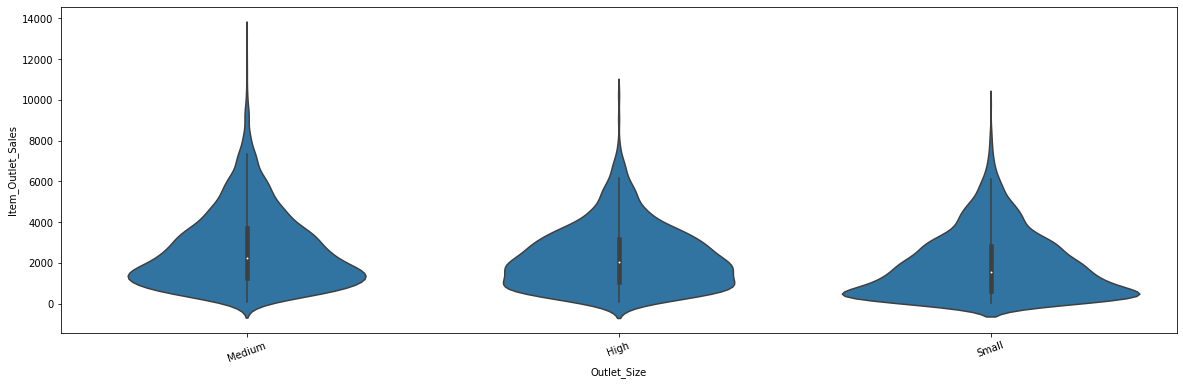

In [21]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 6])

#Let's return the axes object
ax1 = sb.violinplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales', color=base_color, innner='quartile')
plt.xticks(rotation=20);


In [28]:
train.groupby(['Item_Fat_Content','Item_Type']).size()

  

Item_Fat_Content  Item_Type            
LF                Baking Goods             20
                  Breads                    8
                  Breakfast                 2
                  Canned                   17
                  Dairy                    24
                                           ..
reg               Fruits and Vegetables    25
                  Meat                      7
                  Snack Foods              23
                  Soft Drinks               1
                  Starchy Foods             7
Length: 70, dtype: int64